In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
import pandas as pd
from scipy.optimize import minimize, LinearConstraint
from scipy.spatial import ConvexHull
from fringelab import Fringe,FringeSet
from fringelab.algorithms import MultiFociCorrectionAlgorithm

# Генерация интерферограмм 

## опеределение уравнения интенсивности
## I(x,y)=A(x,y)+B(x,y)*cos(phi(x,y)+step)

In [2]:
# Функции фазы (Phi)
phase_quadratic_shifted = (lambda c=5, step=0, x_shift=0.0, y_shift=0.0: 
                           lambda x, y: c * np.pi * ((x + x_shift) ** 2 + (y + y_shift) ** 2) + step)
"""Квадратичная фаза с небольшим сдвигом по X/Y. Полезна для моделирования несимметричных интерферограмм."""
phase_quadratic_tilted = lambda c=5, step=0: lambda x, y: c * np.pi * (x ** 2 + y ** 2 - y) + step
"""Квадратичная фаза с наклоном по Y. Может использоваться для моделирования фазовых градиентов."""

# Функции средней интенсивности (A) и амплитуды интерференционной полосы (B)
intensity_const = lambda c: lambda x,y: c
intensity_gaussian = lambda amplitude=1, decay=0.02: lambda x, y: amplitude * np.exp(-decay * (x**2 + y**2))
"""Гауссово распределение интенсивности, задающее плавный спад яркости от центра к краям."""



'Гауссово распределение интенсивности, задающее плавный спад яркости от центра к краям.'

## задание фазового сдвига, генерация интерференционных картин

In [3]:
size = 512 # размер стороны квадрата интерфеограммы в пикселах
step1 = np.pi / 4   # величина фазового сдвига pi/4
step2 = 2*np.pi / 3 # величина фазового сдвига 2*pi/3

F1 = Fringe(size=size, 
            A_func=intensity_const(1), 
            B_func=intensity_const(0.9), 
            Fi_func=phase_quadratic_shifted(c=5, step=0))

fringeset_F1base2 = FringeSet.create_set_from_base(base_fringe=F1, step = step2, count = 2)
fringeset_F1base3 = FringeSet.create_set_from_base(base_fringe=F1, step = step2, count = 3)

F2_1 = Fringe(size=size, 
            A_func=intensity_gaussian(1), 
            B_func=intensity_gaussian(0.9), 
            Fi_func=phase_quadratic_shifted(c=5, step=0, x_shift=0.7))

F2_2 = Fringe(size=size, 
            A_func=intensity_gaussian(0.95), 
            B_func=intensity_gaussian(0.85), 
            Fi_func=phase_quadratic_shifted(c=5, step=step1, x_shift=0.7))      

F2_3 = Fringe(size=size, 
            A_func=intensity_gaussian(0.9), 
            B_func=intensity_gaussian(0.8), 
            Fi_func=phase_quadratic_shifted(c=5, step=2*step1, x_shift=0.7)) 

F2_4 = Fringe(size=size, 
            A_func=intensity_gaussian(0.85), 
            B_func=intensity_gaussian(0.75), 
            Fi_func=phase_quadratic_shifted(c=5, step=3*step1, x_shift=0.7)) 

F2_5 = Fringe(size=size, 
            A_func=intensity_gaussian(0.8), 
            B_func=intensity_gaussian(0.7), 
            Fi_func=phase_quadratic_shifted(c=5, step=4*step1, x_shift=0.7)) 


fringeset_F2base3 = FringeSet([F2_1, F2_2, F2_3])

## визуализация интерференционных картин

<module 'matplotlib.pyplot' from '/Users/ekazakov/wp/optica/fringelab-dev/fringenv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

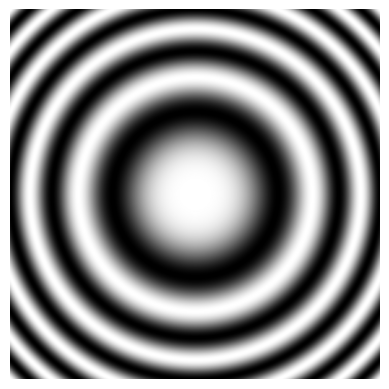

In [4]:
F1.plot()

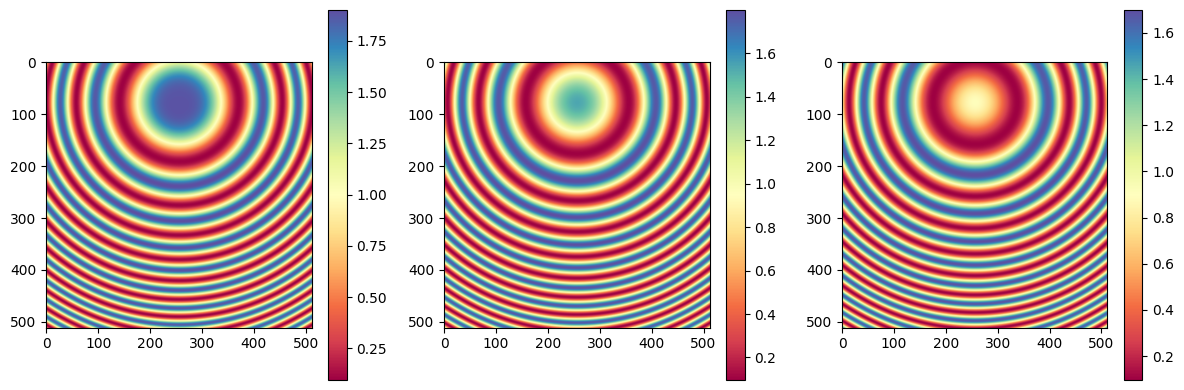

In [5]:
fringeset_F2base3.plot(columns=3)

# Траектории интенсивностей
## Пространственно-временной анализ

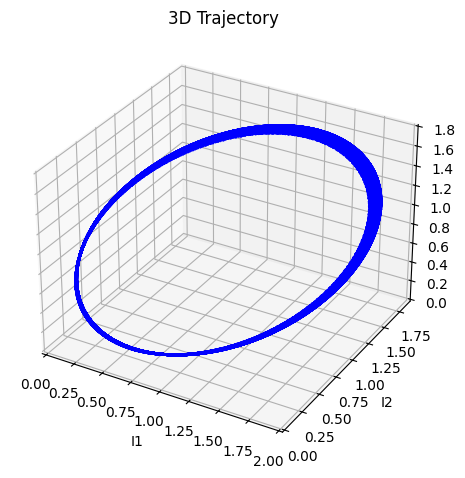

In [6]:
trajectory_fs_F2base3 = fringeset_F2base3.get_trajectory()
trajectory_fs_F2base3.plot()

In [ ]:
# тест
points = np.array([
    [0.0, 0.0],
    [0.0, 0.6],
    [1.0, 0.0],
    [0.0, 0.0],
    [0.0, 1.0]
    # Add more points as needed
])

import time

start_time = time.perf_counter()
multifoci_alg = MultiFociCorrectionAlgorithm(debug=False)
multifoci_alg.recover_phase(points)
end_time = time.perf_counter()
print(f"Elapsed time: {end_time - start_time:.6f} seconds")

init
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.024416539028503187
       x: [ 5.359e-01  4.637e-01  6.769e-01]
     nit: 8
     jac: [ 3.772e-04  3.651e-04 -3.017e-03]
    nfev: 35
    njev: 8
optimize
multiply 0
move 0
optimize: 0
total_error: 0.09795772666095505
multiply 1
move 1
optimize: 1
total_error: 0.28905559647633705
Attempted to remove a focus, error after removal: 0.026111947438543063
multiply 2
move 2
optimize: 2
total_error: 0.41240341116955814
Attempted to remove a focus, error after removal: 0.21782179099592375
multiply 3
move 3
optimize: 3
total_error: 0.9048213887102681
Attempted to remove a focus, error after removal: 0.49035995901874957
multiply 4
move 4
optimize: 4
total_error: 1.1865084279085594
Attempted to remove a focus, error after removal: 0.5418238014821375
multiply 5
move 5
optimize: 5
total_error: 1.4165780468200908
Attempted to remove a focus, error after removal: 1.104211481240057
multiply 6
move 6
optimize: 6
t

In [ ]:
# тест
points = np.array([
    [0.0, 0.0],
    [0.0, 0.6],
    [1.0, 0.0],
    [0.0, 0.0],
    [0.0, 1.0]
    # Add more points as needed
])

import time

start_time = time.perf_counter()
approximate_lemniscate(points)
end_time = time.perf_counter()
print(f"Elapsed time: {end_time - start_time:.6f} seconds")

# Генерация интерферограмм 

In [ ]:
def lemniscate_equation(x, y, foci, R):
    result = 1.0
    for focus in foci:
        result *= np.sqrt((x - focus[0])**2 + (y - focus[1])**2)
    return result - R

def ellipse_equation(x, y, foci, R):
    result = 0.0
    for focus in foci:
        result += np.sqrt((x - focus[0])**2 + (y - focus[1])**2)
    return result - R
    
def generate_lemniscate_by_x(x_values, minY, maxY, foci, R, N, equation=lemniscate_equation, eps=0.01):
    # Генерация точек лемнискаты
    y_values = np.linspace(minY, maxY, N)
    points = []
    for x in x_values:
        for y in y_values:
            if np.abs(equation(x, y, foci, R)) < eps:
                points.append([x, y])
                

    return np.array(points)

def generate_lemniscate(minX, maxX, minY, maxY, foci, R, N, equation=lemniscate_equation, eps=0.01):
    # Генерация точек лемнискаты
    x_values = np.linspace(minX, maxX, N)
    return generate_lemniscate_by_x(x_values, minY, maxY, foci, R, N, equation, eps)

In [ ]:
def plot_three_focus_ellipse(focuses, a):

    F1 = focuses[0]
    F2 = focuses[1] 
    F3 = focuses[2] 
    
    x0 = (F1[0] + F2[0] + F3[0]) / 3
    y0 = (F1[1] + F2[1] + F3[1]) / 3
    print(x0, y0)

    d1 = np.sqrt((x0 - F1[0])**2 + (y0 - F1[1])**2)
    d2 = np.sqrt((x0 - F2[0])**2 + (y0 - F2[1])**2)
    d3 = np.sqrt((x0 - F3[0])**2 + (y0 - F3[1])**2)
    print(d1, d2, d3)

    #assert np.isclose(d1 + d2 + d3, 2*a), "Invalid parameters: The sum of distances from the center to the foci must be equal to 2a."
    

    e = np.sqrt(1 - (d3**2) / (4*a**2))
    
    phi = np.arctan2(F3[1] - F1[1], F3[0] - F1[0])
    
    theta = np.linspace(0, 2*np.pi, 1000)
    r = 2 * a * (1 - e**2) / (1 - e * np.cos(theta - phi))
    
    x = r * np.cos(theta) + x0
    y = r * np.sin(theta) + y0
    
    return np.column_stack((x, y))

In [ ]:
def generate_fringe_frame(size, A_func, B_func, Fi_func):
    Fi = np.empty([size, size])
    A = np.empty([size, size])
    B = np.empty([size, size])
    
    for i in range(size):
        for j in range(size):
            x = i / (size / 2) - 1
            y = j / (size / 2) - 1
            Fi[i][j] = Fi_func(x,y)
            A[i][j] = A_func(x,y)
            B[i][j] = B_func(x,y)
    I = A + B * np.cos(Fi)
    return I,A,B,Fi

In [ ]:
fringe1 = Fringe(size, A_func(1), B_func(0.9),Fi_func(1,0))
fringe2 = Fringe(size, A_func(1), B_func(0.9),Fi_func(1,step))

I1 = fringe1.intensity
I2 = fringe2.intensity

In [ ]:
fringe_set = FringeSet.create_set_from_fringes(fringe1, fringe2, fringe1, fringe2)
#trajectory = fringe_set.get_trajectory()
fringe_set.plot(columns=2)

In [ ]:
def plot_fringes(columns=3, **fringes):
    num_images = len(fringes)
    num_cols = min(num_images,columns)  
    num_rows = (num_images + 1) // num_cols  

    fig, axs = plt.subplots(num_rows, num_cols)  

    for i, (name, image) in enumerate(fringes.items()):
        row = i // num_cols
        col = i % num_cols
        ax = axs[row, col] if num_rows > 1 else axs[col]

        ax.imshow(image, cmap='Spectral')
        ax.set_title(name)
        fig.colorbar(ax.get_images()[0], ax=ax)

    fig.tight_layout()

In [ ]:
def norm(nparr, c):
     return c*((nparr - nparr. min ())/ (nparr. max () - nparr. min()))

In [ ]:
Y_distort = lambda image, y: np.power(image, y)
y = 2.2
I1_ydistort = Y_distort(I1, y)
I2_ydistort = Y_distort(I2, y)

y = 1.1
I1_ydistort11 = Y_distort(I1, y)
I2_ydistort11 = Y_distort(I2, y)

y = 1.2
I1_ydistort12 = Y_distort(I1, y)
I2_ydistort12 = Y_distort(I2, y)

y = 1.4
I1_ydistort14 = Y_distort(I1, y)
I2_ydistort14 = Y_distort(I2, y)

y = 1.6
I1_ydistort16 = Y_distort(I1, y)
I2_ydistort16 = Y_distort(I2, y)

y = 1.8
I1_ydistort18 = Y_distort(I1, y)
I2_ydistort18 = Y_distort(I2, y)

y = 2.0
I1_ydistort20 = Y_distort(I1, y)
I2_ydistort20 = Y_distort(I2, y)

In [ ]:
norm_factor=1

I1 = norm(I1,norm_factor)
I2 = norm(I2,norm_factor)

I1_ydistort = norm(I1_ydistort,norm_factor)
I2_ydistort = norm(I2_ydistort,norm_factor)

I1_ydistort11 = norm(I1_ydistort11,norm_factor)
I2_ydistort11 = norm(I2_ydistort11,norm_factor)

I1_ydistort12 = norm(I1_ydistort12,norm_factor)
I2_ydistort12 = norm(I2_ydistort12,norm_factor)

I1_ydistort14 = norm(I1_ydistort14,norm_factor)
I2_ydistort14 = norm(I2_ydistort14,norm_factor)

I1_ydistort16 = norm(I1_ydistort16,norm_factor)
I2_ydistort16 = norm(I2_ydistort16,norm_factor)

I1_ydistort18 = norm(I1_ydistort18,norm_factor)
I2_ydistort18 = norm(I2_ydistort18,norm_factor)

I1_ydistort20 = norm(I1_ydistort20,norm_factor)
I2_ydistort20 = norm(I2_ydistort20,norm_factor)

In [ ]:
plot_fringes(2, a=I1, b=I2, c=I1_ydistort,d=I2_ydistort)

In [ ]:
plot_fringes(2, в=I1_ydistort,г=I2_ydistort)

In [ ]:
def draw_trajectory(II):
    plt.scatter(II[:, 0], II[:, 1], label='I', s=1)
    x_max = np.max(I1)
    plt.axis('equal')
    plt.xlabel('I1')
    plt.ylabel('I2')
    plt.title('I trajectory')
    plt.grid(True)
    plt.legend(loc='upper right')
    plt.show()

In [ ]:
def create_trajectory(I1, I2):
    # Flatten the arrays
    I1_flattened = I1.flatten()
    I2_flattened = I2.flatten()

    # Stack the flattened arrays vertically
    points = np.vstack((I1_flattened, I2_flattened)).T
    return points

In [ ]:
II = create_trajectory(I1,I2)
II_ydistort = create_trajectory(I1_ydistort,I2_ydistort)


In [ ]:
plt.clf()
plt.scatter(II_ydistort[:, 0], II_ydistort[:, 1], s=1, label='distorted I', c='red')
#plt.scatter(II_ydistort2[:, 0], II_ydistort2[:, 1], s=1, label='distorted I2', c='green')
draw_trajectory(II)

In [ ]:
approximate_lemniscate(II_ydistort, max_iterations=3, mode=ELLIPSE)

In [ ]:
def mse(params, points, equation=lemniscate_equation):
    foci = params[:-1].reshape((-1, 2))
    R = params[-1]
    
    sorted_indices = np.argsort(points[:, 0])
    ordered_points = points[sorted_indices]
    
    # Initialize array to store lemniscate equation values for each point
    lemniscate_values = np.zeros(len(points))

    # Iterate over each point
    for i, (x, y) in enumerate(points):
        # Compute the value of the lemniscate equation at the current point
        lemniscate_values[i] = equation(x, y, foci, R)

    # Compute the mean squared error
    mse_value = np.mean(lemniscate_values ** 2)
    print("params:", params, "mse_value:", mse_value)
    return mse_value
    

In [ ]:
from scipy.optimize import minimize

# Define the optimization function
def optimize_parameters(points):
    # Calculate the center point as the average of the foci
    center_point = np.mean(points[:-1], axis=0)
    
    # Calculate initial R
    distances = np.linalg.norm(points - init_point, axis=1)  # Calculate distances from init_point
    init_R = np.prod(distances) ** (1 / len(points))  # Compute the product of distances
    
    # Define initial guess for foci and R
    initial_guess = np.array([center_point[0], center_point[1], 
                              center_point[0] + init_R / 3, center_point[1] + init_R / 3, 
                              center_point[0] - init_R / 3, center_point[1] - init_R / 3,
                              init_R])
    
    return optimize_parameters(initial_guess, points)

def optimize_parameters(initial_guess, points, equation=lemniscate_equation):
    # Define bounds for foci and R
    bounds = [(0, 2*R)] * (len(initial_guess) - 1) + [(0.1, 10)]
    
    func = lambda params, points: mse(params, points, equation)
    # Perform optimization
    result = minimize(mse, initial_guess, args=(points,), bounds=bounds)
    
    return result.x

In [ ]:
focuses=[[0.5,2.5], [0.5,0.25], [2.5,0.5]]
R=3
N=1000
lemniscate_points=generate_lemniscate(focuses, R, N)

In [ ]:
init_centroid(II_ydistort)

In [ ]:
focuses = np.tile(init_point, (3, 1)) 
init_R= init_radius(II_ydistort[random_indices], init_point)

initial_focuses = np.array(focuses).flatten()
initial_params = np.concatenate((initial_focuses, [init_R]))
initial_params
print(initial_params)
mse(initial_params, II_ydistort)
optimal_params = optimize_parameters(initial_params, II_ydistort)



In [ ]:
focuses2=[[0.36568831, 2.5764611 ],
 [0.62824112, 0.59494388],
 [2.6655795,  0.41817709]]
R2=3.271289343269531
N=1500
lemniscate_points2=generate_lemniscate(focuses2, R2, N)

In [ ]:

optimal_params = optimize_parameters(initial_params, II_ydistort)
optimal_foci = optimal_params[:-1].reshape((-1, 2))
optimal_radius = optimal_params[-1]

In [ ]:
def init_centroid(points):
    return np.mean(points, axis=0)

In [ ]:
II_centroid_x, II_centroid_y = init_centroid(II)
II_ydistort_centroid_x, II_ydistort_centroid_y  = init_centroid(II_ydistort)

In [ ]:
def generate_random_xy(N, size):
    np.random
    random_x = np.random.randint(0, size+1, size=N)
    random_y = np.random.randint(0, size+1, size=N)
    return random_x,random_y
    
# calculate phases for initial ellipse
def generate_random_points(x, y, I1, I2):
    random_points_I1 = I1[x, y]
    random_points_I2 = I2[x, y]
    
    data = {
        'I1': random_points_I1,
        'I2': random_points_I2
    }

    # Convert to DataFrame
    df = pd.DataFrame(data)

    # Return the random points
    return df

In [ ]:
x, y= generate_random_xy(15,400)
x,y

In [ ]:
x_arr = np.array([359, 
                  358, 
                  231,
                  141,  
                  #211,
                  257,
                  #141,
        165])
y_arr = np.array([8,  
                  343, 
                  295,
                  343, 
                  #348,
                  234,
                  #76,
        378])

In [ ]:
df_II = generate_random_points(x_arr, y_arr, I1, I2)
df_II  

In [ ]:
df_II_distorted = generate_random_points(x_arr, y_arr, I1_ydistort,I2_ydistort)
df_II_distorted

df_II_distorted11 = generate_random_points(x_arr, y_arr, I1_ydistort11,I2_ydistort11)
print(df_II_distorted11)
df_II_distorted12 = generate_random_points(x_arr, y_arr, I1_ydistort12,I2_ydistort12)
print(df_II_distorted12)
df_II_distorted14 = generate_random_points(x_arr, y_arr, I1_ydistort14,I2_ydistort14)
print(df_II_distorted14)
df_II_distorted16 = generate_random_points(x_arr, y_arr, I1_ydistort16,I2_ydistort16)
print(df_II_distorted16)
df_II_distorted18 = generate_random_points(x_arr, y_arr, I1_ydistort18,I2_ydistort18)
print(df_II_distorted18)
df_II_distorted2 = generate_random_points(x_arr, y_arr, I1_ydistort2,I2_ydistort2)
print(df_II_distorted2)

In [ ]:
def angle_between_vectors(vector1, vector2):
    dot_product = np.dot(vector1, vector2)
    norm_vector1 = np.linalg.norm(vector1)
    norm_vector2 = np.linalg.norm(vector2)
    cosine_angle = dot_product / (norm_vector1 * norm_vector2)
    angle = np.arccos(cosine_angle)
    if vector1[1] < 0:
        angle = -angle
    return angle

In [ ]:
def calculate_angles(centroid, points, columns):
    # Calculate the differences in x and y coordinates between points and the centroid
    dx = points[:, 0] - centroid[0]
    dy = points[:, 1] - centroid[1]
    
    # Create vectors from differences
    vectors = np.column_stack((dx, dy))
    
    # Calculate the angle between each vector and the x-axis
    angles_rad = []
    for vector in vectors:
        x_axis_vector = np.array([1, 0])  # Assuming x-axis is [1, 0]
        angle_rad = angle_between_vectors(vector, x_axis_vector)
        angles_rad.append(angle_rad)
    
    # Convert angles to degrees
    angles_deg = np.degrees(angles_rad)
    # Create a DataFrame to store the results
    df = pd.DataFrame({columns[0]: points[:, 0], columns[1]: points[:, 1], columns[2]: angles_rad, columns[3]: angles_deg})
    
    return df

In [ ]:
focuses=[[0.0,0.5], [0.0,0.0], [0.5,0.0]]
R=1.0
N=1000

In [ ]:
lemniscate_points=generate_lemniscate(-0.5,3.5,-0.5,3.5,focuses, R, N)

In [ ]:
el_focuses=[[0.0,0.5], [0.0,0.0], [0.5,0.0]]
el_R=1.25
N=1000

In [ ]:
triellipse = generate_lemniscate(-0.5,1,-0.5,1, el_focuses,el_R,N,equation=ellipse_equation)

In [ ]:
triellipse2 = generate_lemniscate(-0.5,1,-0.5,1, el_focuses,el_R,N,equation=ellipse_equation)

In [ ]:
plt.scatter(*zip(*(el_focuses)), color='orange', marker='o')  
plt.axis('equal')
plt.title('Intensity trajectory')
plt.grid(True)
plt.legend(loc='upper right')
plt.scatter(triellipse[:, 0], triellipse[:, 1], s=1, label='approximated I', c='orange')
plt.scatter(triellipse2[:, 0], triellipse2[:, 1], s=1, label='approximated I', c='orange')
plt.show()

In [ ]:
initial_focuses = np.array(focuses).flatten()
initial_params = np.concatenate((initial_focuses, [R]))
initial_params
print(initial_params)
mse(initial_params, II_ydistort)
optimal_params = optimize_parameters(initial_params, II_ydistort, equation=ellipse_equation)
print(optimal_params)

In [ ]:
el_focuses=[[0.25,2.4], [0.93,0.93], [2.4,0.25]]
el_R=4.68
N=1000

triellipse = generate_lemniscate(-0.5,4,-0.5,4, el_focuses,el_R,N,equation=ellipse_equation)

In [ ]:
focuses=[[0.485, 2.061], [0.870, 0.847],  [2.094, 0.508]]
R=1.68
N=1200
lemniscate = generate_lemniscate(-0.5,4,-0.5,4,focuses, R, N)

In [ ]:
II_ydistort14 = create_trajectory(I1_ydistort14,I2_ydistort14)

initial_focuses = np.array(focuses).flatten()
initial_params = np.concatenate((initial_focuses, [R]))
initial_params
mse_lemni = mse(initial_params, II_ydistort14)
print('lemni',mse_lemni)

optimal_params = optimize_parameters(initial_params, II_ydistort14)
print(optimal_params)

KeyboardInterrupt: 

In [ ]:
initial_focuses = np.array(el_focuses).flatten()
initial_params = np.concatenate((initial_focuses, [el_R]))
initial_params

mse_ellipse = mse(initial_params, II_ydistort14,equation=ellipse_equation)
optimal_params = optimize_parameters(initial_params, II_ydistort14,equation=ellipse_equation)
print('ellipse',mse_ellipse)

params: [0.         3.04525351 0.9648189  0.84991555 3.14530952 0.55287102
 5.02855924] mse_value: 0.27487199236778276
params: [0.         3.0452535  0.96481891 0.84991555 3.14530952 0.55287102
 5.02855924] mse_value: 0.27487199034576143
params: [0.         3.0452535  0.9648189  0.84991556 3.14530952 0.55287102
 5.02855924] mse_value: 0.2748719946177718
params: [0.         3.0452535  0.9648189  0.84991555 3.14530953 0.55287102
 5.02855924] mse_value: 0.27487199524357064
params: [0.         3.0452535  0.9648189  0.84991555 3.14530952 0.55287103
 5.02855924] mse_value: 0.27487199346525215
params: [0.         3.0452535  0.9648189  0.84991555 3.14530952 0.55287102
 5.02855925] mse_value: 0.2748719888027618
params: [0.         3.04505291 0.95941693 0.84480296 3.12940264 0.53435395
 5.02358218] mse_value: 0.2642022967869248
params: [1.00000000e-08 3.04505291e+00 9.59416925e-01 8.44802960e-01
 3.12940264e+00 5.34353945e-01 5.02358218e+00] mse_value: 0.2642022996965094
params: [0.         3.04

KeyboardInterrupt: 

In [ ]:
norm_f = 1
II_x_norm = norm(I1,norm_f)
II_y_norm = norm(I2,norm_f)

II_dist14_x_norm = norm(I1_ydistort14,norm_f)
II_dist14_y_norm = norm(I2_ydistort14,norm_f)

df_x_norm = norm(df_II_distorted14['I1'],norm_f)
df_y_norm = norm(df_II_distorted14['I2'],norm_f)

el_x_norm = norm(triellipse[:, 0],norm_f)
el_y_norm = norm(triellipse[:, 1],norm_f)

elf_x_norm = (np.array(el_focuses)[:, 0] - triellipse[:, 0]. min ())/ (triellipse[:, 0]. max () - triellipse[:, 0]. min())
elf_y_norm = (np.array(el_focuses)[:, 1] - triellipse[:, 1]. min ())/ (triellipse[:, 1]. max () - triellipse[:, 1]. min())

lem_x_norm = norm(lemniscate[:, 0],norm_f)
lem_y_norm = norm(lemniscate[:, 1],norm_f)

lemf_x_norm = (np.array(focuses)[:, 0] - lemniscate[:, 0]. min ())/ (lemniscate[:, 0]. max () - lemniscate[:, 0]. min())
lemf_y_norm = (np.array(focuses)[:, 1] - lemniscate[:, 1]. min ())/ (lemniscate[:, 1]. max () - lemniscate[:, 1]. min())

In [ ]:
I1_norm = norm(I1,norm_f)
I2_norm = norm(I2,norm_f)

I1_ydistort_norm = norm(I1_ydistort,norm_f)
I2_ydistort_norm = norm(I2_ydistort,norm_f)

I1_ydistort12_norm = norm(I1_ydistort12,norm_f)
I2_ydistort12_norm = norm(I2_ydistort12,norm_f)

I1_ydistort16_norm = norm(I1_ydistort16,norm_f)
I2_ydistort16_norm = norm(I2_ydistort16,norm_f)

v = norm(I1_ydistort20,norm_f)
I2_ydistort20_norm = norm(I2_ydistort20,norm_f)

In [ ]:
# x_arr = np.array([359,211])
# y_arr = np.array([8,348])

df_II = generate_random_points(x_arr, y_arr, I1_norm, I2_norm)
df_II
print(df_II)

df_II_distorted12 = generate_random_points(x_arr, y_arr, I1_ydistort12_norm,I2_ydistort12_norm)
print(df_II_distorted12)

df_II_distorted16 = generate_random_points(x_arr, y_arr, I1_ydistort16_norm,I2_ydistort16_norm)
print(df_II_distorted16)
df_II_distorted20 = generate_random_points(x_arr, y_arr, I1_ydistort20_norm,I2_ydistort20_norm)
print(df_II_distorted20)

arr1 = [[df['I1'].iloc[0], df['I2'].iloc[0]] for df in [df_II_distorted20, df_II_distorted16, df_II_distorted12, df_II]]

arr2 = [[df['I1'].iloc[1], df['I2'].iloc[1]] for df in [df_II_distorted20, df_II_distorted16, df_II_distorted12, df_II]]

arr3 = [[df['I1'].iloc[2], df['I2'].iloc[2]] for df in [df_II_distorted20, df_II_distorted16, df_II_distorted12, df_II]]

arr4 = [[df['I1'].iloc[3], df['I2'].iloc[3]] for df in [df_II_distorted20, df_II_distorted16, df_II_distorted12, df_II]]

arr5 = [[df['I1'].iloc[4], df['I2'].iloc[4]] for df in [df_II_distorted20, df_II_distorted16, df_II_distorted12, df_II]]

arr6 = [[df['I1'].iloc[5], df['I2'].iloc[5]] for df in [df_II_distorted20, df_II_distorted16, df_II_distorted12, df_II]]

#arr7 = [[df['I1'].iloc[6], df['I2'].iloc[6]] for df in [df_II_distorted20, df_II_distorted16, df_II_distorted12, df_II]]

#arr8 = [[df['I1'].iloc[7], df['I2'].iloc[7]] for df in [df_II_distorted20, df_II_distorted16, df_II_distorted12, df_II]]

print(arr1)
print(arr2)

centroids = [[np.mean(x),np.mean(y)] for x,y in [[I1_ydistort20, I2_ydistort20], 
                                           [I1_ydistort16, I2_ydistort16_norm],
                                           [I1_ydistort12, I2_ydistort12],
                                           [I1, I2]]]


print(centroids)
print(np.mean(II_x_norm),np.mean(II_y_norm))

In [ ]:
def plt_arrows(arr, color='purple'):
    x = [point[0] for point in arr]
    y = [point[1] for point in arr]

    # Calculate differences for arrow directions
    dx = [x[i+1] - x[i] for i in range(len(x)-1)]
    dy = [y[i+1] - y[i] for i in range(len(y)-1)]
    
    plt.quiver(x[:-1], y[:-1], dx, dy, scale_units='xy', angles='xy', scale=1, color=color)


In [ ]:
el_focuses2=[[0.35,1.65], [1.65,0.35]]
el_R2=2.2
N=500

ellipse = generate_lemniscate(-0.5,3,-0.5,3, el_focuses2,el_R2,N,equation=ellipse_equation)

el_x_norm2 = norm(ellipse[:, 0],norm_f)
el_y_norm2 = norm(ellipse[:, 1],norm_f)

elf_x_norm2 = (np.array(el_focuses2)[:, 0] - ellipse[:, 0]. min ())/ (ellipse[:, 0]. max () - ellipse[:, 0]. min())
elf_y_norm2 = (np.array(el_focuses2)[:, 1] - ellipse[:, 1]. min ())/ (ellipse[:, 1]. max () - ellipse[:, 1]. min())

In [ ]:
el_focuses14=[[0.0,2.4], [0.93,0.93], [2.4,0.0]]
el_R14=4.68
N=1000

triellipse14 = generate_lemniscate(-0.5,4,-0.5,4, el_focuses,el_R,N,equation=ellipse_equation)

In [ ]:
el_focuses16=[[0.1,1.8], [0.3, 0.2930809838138163], [1.8,0.1]]
el_R16=4.68
N=1000

triellipse16 = generate_lemniscate(-1,5,-1,5, el_focuses16,el_R16,N,equation=ellipse_equation)

el_x16_norm = norm(triellipse16[:, 0],norm_f)
el_y16_norm = norm(triellipse16[:, 1],norm_f)

elf_x16_norm = (np.array(el_focuses16)[:, 0] - triellipse16[:, 0]. min ())/ (triellipse16[:, 0]. max () - triellipse16[:, 0]. min())
elf_y16_norm = (np.array(el_focuses16)[:, 1] - triellipse16[:, 1]. min ())/ (triellipse16[:, 1]. max () - triellipse16[:, 1]. min())

In [ ]:
from matplotlib.ticker import MultipleLocator

def plt_point(df,c='purple', va='top',ha='right', label=False):
    plt.scatter(df['I1'], df['I2'], c=c, s=10)
    if label:
        for i, (x, y) in enumerate(zip(df['I1'], df['I2'])):
            plt.text(x, y, str(i+1), fontsize=12, c=c, ha=ha, va=va)
#             if va=='top':
#                 va='bottom'
#                 ha='left'
#             else:
#                 va='top'
#                 ha='right'

plt.clf()
plt.scatter(II_x_norm, II_y_norm, label='original I', s=1)

plt.scatter(I1_ydistort20_norm[::200], I2_ydistort20_norm[::200], s=1, label='distorted I', c='red')

#plt.scatter(lemniscate_points[:, 0], lemniscate_points[:, 1], s=1, label='approximated I', c='green')

#plt.scatter(el_x_norm2, el_y_norm2, s=1, label='ellipse approx.', c='orange')
# plt.scatter(elf_x_norm2,elf_y_norm2, color='blue', marker='o') 
#plt.scatter(ellipse[:, 0], ellipse[:, 1], s=1, label='ellipse approx.', c='orange')
#plt.scatter(elf_x_norm,elf_y_norm, color='grey', marker='o') 
#plt.scatter(elf_x16_norm[1],elf_y16_norm[1], color='grey', marker='o') 

#plt.scatter(lem_x_norm[::2], lem_y_norm[::2], s=1, label='fitted I', c='green')
#plt.scatter(lemf_x_norm,lemf_y_norm, color='green', marker='o') 

#plt.scatter(lemniscate_points[:, 0], lemniscate_points[:, 1], s=1, label='approximated I', c='lightgreen')
#plt.scatter(*zip(*focuses), color='lightgreen', marker='o')  

# plt.axvline(x=II_centroid_x, color='grey', linestyle='--')
# plt.axhline(y=II_centroid_y, color='grey', linestyle='--')
# 
# plt.axvline(x=II_ydistort_centroid_x, color='grey', linestyle='--')
# plt.axhline(y=II_ydistort_centroid_y, color='grey', linestyle='--')
#plt.scatter(II_ydistort_centroid_x,II_ydistort_centroid_y, color='red', marker='o')  
#plt.scatter(II_centroid_x,II_centroid_y, color='blue', marker='o')  

#plt.scatter(I1_ydistort11[::200].flatten(), I2_ydistort11[::200].flatten(), s=1, label='intermediate I', c='lightgrey')
plt.scatter(I1_ydistort12_norm[::200].flatten(), I2_ydistort12_norm[::200].flatten(), label='intermediate I', s=1, c='lightgrey')
#plt.scatter(I1_ydistort14[::200].flatten(), I2_ydistort14[::200].flatten(), s=1, c='lightgrey')
plt.scatter(I1_ydistort16_norm[::200].flatten(), I2_ydistort16_norm[::200].flatten(), s=1, c='lightgrey')
#plt.scatter(I1_ydistort18[::200].flatten(), I2_ydistort18[::200].flatten(), s=1, c='lightgrey')
#plt.scatter(I1_ydistort20_norm[::200].flatten(), I2_ydistort20_norm[::200].flatten(), s=1, c='lightgrey')



# plt_point(df_II_distorted11)
# plt_point(df_II_distorted12)
# plt_point(df_II_distorted14)
# plt_point(df_II_distorted16)
# plt_point(df_II_distorted18)
plt_point(df_II_distorted20,  va='top', ha='right', label=True)
#plt_point(df_II_distorted16, va='top', ha='right', label=False)
#plt_point(df_II_distorted12, va='top', ha='right', label=False)
plt_point(df_II, va='bottom',ha='left', label=True)
plt_arrows(arr1)
plt_arrows(arr2)
plt_arrows(arr3)
plt_arrows(arr4)
plt_arrows(arr5)
plt_arrows(arr6)
#plt_arrows(arr7)
#plt_arrows(arr8)


plt.axis('equal')
plt.xlabel('I1')
plt.ylabel('I2')
plt.title('Intensity trajectory')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()



In [ ]:
I1_I2_array = np.column_stack((df_II['I1'].values, df_II['I2'].values))
II_phases = calculate_angles([II_centroid_x,II_centroid_y], I1_I2_array,['I1','I2','angle_rad','angle_deg'])

I1_I2_distort_array = np.column_stack((df_II_distorted['I1'].values, df_II_distorted['I2'].values))
II_dist_phases =calculate_angles([II_ydistort_centroid_x,II_ydistort_centroid_y], I1_I2_distort_array,['I1_dist','I2_dist','angle_dist_rad','angle_dist_deg'])
pd.set_option('display.float_format', lambda x: '{:.4f}'.format(x))

pd.concat([II_phases, II_dist_phases], axis=1)


In [ ]:
points = lemniscate_points

In [ ]:
def init_radius(points, init_point):
    distances = np.linalg.norm(points - init_point, axis=1)  # Calculate distances from init_point
    radius = np.prod(distances) ** (1 / len(points))  # Compute the product of distances
    return radius

In [ ]:
def double_foci(foci, R):
    # Double the foci
    doubled_foci = np.concatenate((foci, foci), axis=0)
    
    # Square the original radius
    doubled_R = R**2
    
    return doubled_foci, doubled_R

In [ ]:
init_point=init_centroid(II_ydistort)
init_point

In [ ]:
# Get 100 random indices from the 1D array
random_indices = np.random.choice(II_ydistort.shape[0], size=400, replace=False)

init_radius(II_ydistort[random_indices], init_point)

In [ ]:
init_point=init_centroid(points)
init_R=init_radius(points, init_point)


init_lemniscate = generate_lemniscate([init_point.tolist()], float(init_R), 500, 0.001)

In [ ]:
plt.scatter(init_point[0], init_point[1], color='red', label='Initial focus')
plt.scatter(init_lemniscate[:,0], init_lemniscate[:,1], s=0.1, color='red', label='Initial lemniscate')
draw_trajectory(points)

In [ ]:
from scipy.optimize import minimize

def find_foci_and_radius(S, initial_foci, initial_radius, threshold=0.01, max_iterations=100):
    def compute_error2(foci, R):
        # Compute distances from each point to the lemniscate defined by foci and radius
        print(S)
        print(S[:, None])
        print(foci)
        distances = np.sqrt(np.sum((S[:, None] - foci) ** 2, axis=2)) - R
        # Compute mean squared error
        error = np.mean(distances ** 2)
        return error
    
    # Define function to compute the error given foci and radius
    def compute_error(params):
        # Extract foci and radius from parameters
        foci = params[:-1]
        R = params[-1]
        return compute_error2(foci, R)

    # Define function to optimize foci positions using L-BFGS
    def optimize_foci(params):
        result = minimize(compute_error, params, method='L-BFGS-B', bounds=[(-np.inf, np.inf)] * len(params))
        return result.x
    
    def focus_motion(params, max_step=0.1):
        # Initialize variables to store the best direction and its error
        foci = params[:-1]
        R = params[-1]
        best_foci = foci.copy()
        min_error = compute_error(params)

        # Compute the min and max scale of the points
        min_scale = np.min(points)
        max_scale = np.max(points)
        print(f"focus_motion. min_scale: {min_scale} max_scale: {max_scale}")
        # Calculate the maximum allowed step
        max_allowed_step = max_step * (max_scale - min_scale)
        print(f"max_allowed_step {max_allowed_step}")

        # Iterate over each focus individually
        for i, focus in enumerate(foci):
            # Try moving the focus in both positive and negative directions
            for direction in [-1, 1]:
                # Move the focus in the specified direction
                new_focus = focus.copy()
                new_focus[i] += direction * max_allowed_step

                # Compute the error for the new configuration
                error = compute_error2(np.insert(foci, i, new_focus, axis=0), R)

                # Update the best configuration if the error is smaller
                if error < min_error:
                    min_error = error
                    best_foci = np.insert(foci, i, new_focus, axis=0)

        return best_foci

    # Initialize parameters for starting circle
    num_points = len(S)
    optimized_params = optimize_foci(np.concatenate([initial_foci.flatten(), [initial_radius]]))

    # Main loop of the algorithm
    for i in range(max_iterations):
        # Extract foci and radius from optimized parameters
        optimized_foci = optimized_params[:-1].reshape(-1, 2)
        optimized_radius = optimized_params[-1]
        
        print(f"Iteration {i} init phase, foci {optimized_foci}")
        print(f"Iteration {i} init phase, radius {optimized_radius}")

        # Check if number of foci is less than four
        if len(optimized_foci) < 4:
            # Double the foci
            optimized_foci, optimized_radius = double_foci(optimized_foci,optimized_radius)

            # Perform foci motion step
            # (this step is not implemented in the provided algorithm)
            
            # Optimize foci motion
            optimized_foci, optimized_radius = optimize_foci(np.concatenate([optimized_foci.flatten(), [optimized_radius]]))

            # Continue to the next iteration
            continue
        else:
            # Number of foci is at least four
            # Perform removing focus step
            # (this step is not implemented in the provided algorithm)

            # Perform foci motion step
            # (this step is not implemented in the provided algorithm)

            # Optimize foci motion
            optimized_foci = optimize_foci(np.concatenate([optimized_foci.flatten(), [optimized_radius]]))

            # Continue to the next iteration
            continue
        error =compute_error(optimized_foci)
        print(f"Iteration {i}, error {error}")
        # Break the loop if the error is below the threshold
        plt.clf()
        plt.scatter(*zip(*optimized_foci), color='red', label='focuses')
        lemniscate = generate_lemniscate([optimized_foci.tolist()], float(optimized_radius), 500, 0.001)
        plt.scatter(lemniscate[:,0], lemniscate[:,1], s=0.1, color='red', label='Initial lemniscate')
        draw_trajectory(S)
        if error < threshold:
            break

    return optimized_foci, optimized_radius
